In [ ]:
from google.colab import files

# This will open a file picker to upload  dataset
uploaded = files.upload()


Saving YoutubeCommentsDataSet.csv to YoutubeCommentsDataSet.csv


In [ ]:
import pandas as pd

# Load the dataset (use the exact name of the file you uploaded)
df = pd.read_csv("YoutubeCommentsDataSet.csv")

# Show the first 5 rows
df.head()


,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [ ]:
df

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
...,...,...
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive


In [ ]:
# Show column names and dataset shape
print("Columns in dataset:", df.columns.tolist())
print("Shape of dataset (rows, columns):", df.shape)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Show sample rows (random 5 comments)
df.sample(5)


Columns in dataset: ['Comment', 'Sentiment']
Shape of dataset (rows, columns): (18408, 2)

Missing values per column:
Comment      44
Sentiment     0
dtype: int64


,Comment,Sentiment
1241,everyone reading this always remember that tho...,positive
6661,fun note in 1918 british general edmund allenb...,positive
6159,603 i like how he sees them as friends ah guys...,positive
2316,this dude knows more about running a business ...,positive
12937,can we take the time to appreciate how many ho...,positive


In [ ]:
# Remove rows with missing comments
df = df.dropna(subset=['Comment'])

# Reset index after dropping rows
df = df.reset_index(drop=True)

print("New shape after dropping missing comments:", df.shape)


New shape after dropping missing comments: (18364, 2)


In [ ]:
# Show column names and dataset shape
print("Columns in dataset:", df.columns.tolist())
print("Shape of dataset (rows, columns):", df.shape)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Show sample rows (random 5 comments)
df.sample(5)


Columns in dataset: ['Comment', 'Sentiment']
Shape of dataset (rows, columns): (18364, 2)

Missing values per column:
Comment      0
Sentiment    0
dtype: int64


,Comment,Sentiment
16810,अनलिमिटेड बॉलीवुड मूवीज का मजा लेने के लिए हमे...,neutral
13348,work at a bank and take work home fired happen...,negative
9204,this is not just a food review channel this is...,positive
2903,love how its such a natural look for on the go n,positive
24,linus this is not a table also linus lets use ...,neutral


In [ ]:
import re

def clean_text(text):
    # 1. Convert to lowercase
    text = text.lower()
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # 3. Remove emails
    text = re.sub(r'\S+@\S+', '', text)
    # 4. Remove punctuation, numbers, special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # 5. Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning to Comment column
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)

# Show before and after cleaning
df[['Comment', 'Cleaned_Comment']].head(10)


,Comment,Cleaned_Comment
0,lets not forget that apple pay in 2014 require...,lets not forget that apple pay in required a b...
1,here in nz 50 of retailers don’t even have con...,here in nz of retailers dont even have contact...
2,i will forever acknowledge this channel with t...,i will forever acknowledge this channel with t...
3,whenever i go to a place that doesn’t take app...,whenever i go to a place that doesnt take appl...
4,apple pay is so convenient secure and easy to ...,apple pay is so convenient secure and easy to ...
5,we’ve been hounding my bank to adopt apple pay...,weve been hounding my bank to adopt apple pay ...
6,we only got apple pay in south africa in 20202...,we only got apple pay in south africa in and i...
7,for now i need both apple pay and the physical...,for now i need both apple pay and the physical...
8,in the united states we have an abundance of r...,in the united states we have an abundance of r...
9,in cambodia we have a universal qr code system...,in cambodia we have a universal qr code system...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (only first time)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  # extra fix for Colab


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))



In [ ]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens


In [ ]:
df['Tokens'] = df['Cleaned_Comment'].apply(tokenize_and_remove_stopwords)
df[['Cleaned_Comment', 'Tokens']].head(10)


,Cleaned_Comment,Tokens
0,lets not forget that apple pay in required a b...,"[lets, forget, apple, pay, required, brand, ne..."
1,here in nz of retailers dont even have contact...,"[nz, retailers, dont, even, contactless, credi..."
2,i will forever acknowledge this channel with t...,"[forever, acknowledge, channel, help, lessons,..."
3,whenever i go to a place that doesnt take appl...,"[whenever, go, place, doesnt, take, apple, pay..."
4,apple pay is so convenient secure and easy to ...,"[apple, pay, convenient, secure, easy, use, us..."
5,weve been hounding my bank to adopt apple pay ...,"[weve, hounding, bank, adopt, apple, pay, unde..."
6,we only got apple pay in south africa in and i...,"[got, apple, pay, south, africa, widely, accep..."
7,for now i need both apple pay and the physical...,"[need, apple, pay, physical, credit, card]"
8,in the united states we have an abundance of r...,"[united, states, abundance, retailers, accept,..."
9,in cambodia we have a universal qr code system...,"[cambodia, universal, qr, code, system, scan, ..."


In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

df['Stemmed_Tokens'] = df['Tokens'].apply(stem_tokens)
df[['Tokens', 'Stemmed_Tokens']].head(10)


,Tokens,Stemmed_Tokens
0,"[lets, forget, apple, pay, required, brand, ne...","[let, forget, appl, pay, requir, brand, new, i..."
1,"[nz, retailers, dont, even, contactless, credi...","[nz, retail, dont, even, contactless, credit, ..."
2,"[forever, acknowledge, channel, help, lessons,...","[forev, acknowledg, channel, help, lesson, ide..."
3,"[whenever, go, place, doesnt, take, apple, pay...","[whenev, go, place, doesnt, take, appl, pay, d..."
4,"[apple, pay, convenient, secure, easy, use, us...","[appl, pay, conveni, secur, easi, use, use, ko..."
5,"[weve, hounding, bank, adopt, apple, pay, unde...","[weve, hound, bank, adopt, appl, pay, understa..."
6,"[got, apple, pay, south, africa, widely, accep...","[got, appl, pay, south, africa, wide, accept]"
7,"[need, apple, pay, physical, credit, card]","[need, appl, pay, physic, credit, card]"
8,"[united, states, abundance, retailers, accept,...","[unit, state, abund, retail, accept, appl, pay..."
9,"[cambodia, universal, qr, code, system, scan, ...","[cambodia, univers, qr, code, system, scan, se..."


In [ ]:
# Import spaCy and download English model (only first time)
import spacy
nlp = spacy.load("en_core_web_sm")

# Function for lemmatization
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))  # Join tokens into sentence
    return [token.lemma_ for token in doc]

# Apply lemmatization
df['Lemmatized_Tokens'] = df['Tokens'].apply(lemmatize_tokens)

# Show comparison
df[['Tokens', 'Stemmed_Tokens', 'Lemmatized_Tokens']].head(10)


,Tokens,Stemmed_Tokens,Lemmatized_Tokens
0,"[lets, forget, apple, pay, required, brand, ne...","[let, forget, appl, pay, requir, brand, new, i...","[let, forget, apple, pay, require, brand, new,..."
1,"[nz, retailers, dont, even, contactless, credi...","[nz, retail, dont, even, contactless, credit, ...","[nz, retailer, do, not, even, contactless, cre..."
2,"[forever, acknowledge, channel, help, lessons,...","[forev, acknowledg, channel, help, lesson, ide...","[forever, acknowledge, channel, help, lesson, ..."
3,"[whenever, go, place, doesnt, take, apple, pay...","[whenev, go, place, doesnt, take, appl, pay, d...","[whenever, go, place, do, not, take, apple, pa..."
4,"[apple, pay, convenient, secure, easy, use, us...","[appl, pay, conveni, secur, easi, use, use, ko...","[apple, pay, convenient, secure, easy, use, us..."
5,"[weve, hounding, bank, adopt, apple, pay, unde...","[weve, hound, bank, adopt, appl, pay, understa...","[we, ve, hound, bank, adopt, apple, pay, under..."
6,"[got, apple, pay, south, africa, widely, accep...","[got, appl, pay, south, africa, wide, accept]","[get, apple, pay, south, africa, widely, accept]"
7,"[need, apple, pay, physical, credit, card]","[need, appl, pay, physic, credit, card]","[need, apple, pay, physical, credit, card]"
8,"[united, states, abundance, retailers, accept,...","[unit, state, abund, retail, accept, appl, pay...","[united, states, abundance, retailer, accept, ..."
9,"[cambodia, universal, qr, code, system, scan, ...","[cambodia, univers, qr, code, system, scan, se...","[cambodia, universal, qr, code, system, scan, ..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join tokens back into string format because vectorizers need text, not lists
df['Stemmed_Text'] = df['Stemmed_Tokens'].apply(lambda x: " ".join(x))
df['Lemmatized_Text'] = df['Lemmatized_Tokens'].apply(lambda x: " ".join(x))

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # limit to top 5000 words for efficiency

# Transform both versions
X_stemmed = tfidf.fit_transform(df['Stemmed_Text'])
X_lemmatized = tfidf.fit_transform(df['Lemmatized_Text'])

# Labels (sentiments)
y = df['Sentiment']

print("Stemmed features shape:", X_stemmed.shape)
print("Lemmatized features shape:", X_lemmatized.shape)


Stemmed features shape: (18364, 5000)
Lemmatized features shape: (18364, 5000)



===== Logistic Regression =====
Stemmed Accuracy: 0.7519738633269807
Lemmatized Accuracy: 0.7527906343588348


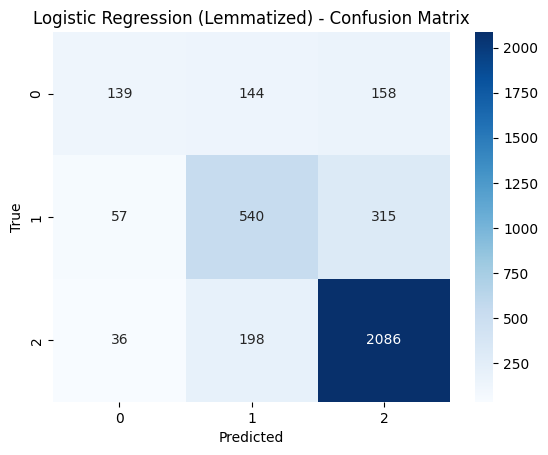


===== Naive Bayes =====
Stemmed Accuracy: 0.6961611761502858
Lemmatized Accuracy: 0.6953444051184318


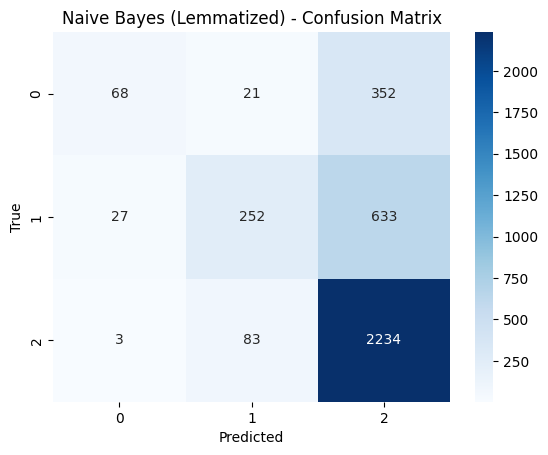

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Split data (80% train, 20% test)
X_train_stem, X_test_stem, y_train, y_test = train_test_split(X_stemmed, y, test_size=0.2, random_state=42)
X_train_lemma, X_test_lemma, _, _ = train_test_split(X_lemmatized, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB()
}

# Train & evaluate models
results = {}

for name, model in models.items():
    # Train on stemmed data
    model.fit(X_train_stem, y_train)
    y_pred_stem = model.predict(X_test_stem)

    # Train on lemmatized data
    model.fit(X_train_lemma, y_train)
    y_pred_lemma = model.predict(X_test_lemma)

    # Store results
    results[name] = {
        "Stemmed": classification_report(y_test, y_pred_stem, output_dict=True),
        "Lemmatized": classification_report(y_test, y_pred_lemma, output_dict=True)
    }

    # Print summary
    print(f"\n===== {name} =====")
    print("Stemmed Accuracy:", accuracy_score(y_test, y_pred_stem))
    print("Lemmatized Accuracy:", accuracy_score(y_test, y_pred_lemma))

    # Confusion Matrix for Lemmatized version
    cm = confusion_matrix(y_test, y_pred_lemma)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} (Lemmatized) - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


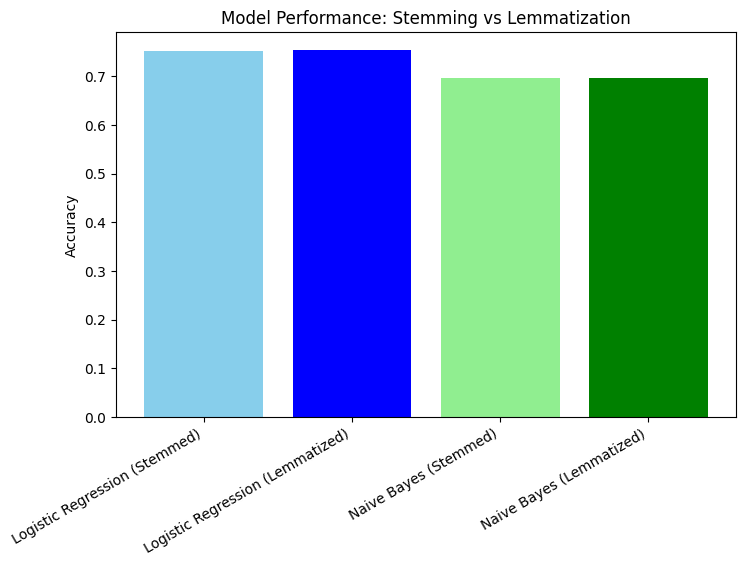

In [ ]:
import matplotlib.pyplot as plt

# Collect accuracies
acc = {
    "Logistic Regression (Stemmed)": 0.7519738633269807,
    "Logistic Regression (Lemmatized)": 0.7527906343588348,
    "Naive Bayes (Stemmed)": 0.6961611761502858,
    "Naive Bayes (Lemmatized)": 0.6953444051184318
}

# Plot
plt.figure(figsize=(8,5))
plt.bar(acc.keys(), acc.values(), color=['skyblue','blue','lightgreen','green'])
plt.xticks(rotation=30, ha='right')
plt.ylabel("Accuracy")
plt.title("Model Performance: Stemming vs Lemmatization")
plt.show()


In [ ]:
# Train final Logistic Regression on full lemmatized data
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_lemmatized, y)

# Function to preprocess + predict a new comment
def predict_sentiment(comment):
    # Step 1: Clean the comment
    cleaned = clean_text(comment)
    # Step 2: Tokenize and remove stopwords
    tokens = tokenize_and_remove_stopwords(cleaned)
    # Step 3: Lemmatize
    lemmas = lemmatize_tokens(tokens)
    # Step 4: Convert to TF-IDF features
    text = " ".join(lemmas)
    features = tfidf.transform([text])
    # Step 5: Predict
    prediction = final_model.predict(features)[0]
    return prediction

# Example predictions
print(predict_sentiment("I love this video, it was amazing!"))
print(predict_sentiment("This is the worst video ever."))
print(predict_sentiment("It's okay, not too good, not too bad."))


positive
negative
positive


In [ ]:
import gradio as gr

def gradio_predict(comment):
    return predict_sentiment(comment)

interface = gr.Interface(fn=gradio_predict,
                         inputs=gr.Textbox(lines=2, placeholder="Enter a YouTube comment..."),
                         outputs="text",
                         title="YouTube Comment Sentiment Analysis",
                         description="Type a YouTube comment to predict sentiment (Positive / Negative / Neutral).")

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://96a8d83139b5683f45.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [1]:
plt.tight_layout()
plt.savefig('confusion_lr_lemma.png', dpi=300, bbox_inches='tight')


NameError: name 'plt' is not defined